# Projeto de Análise Comparativa de modelos

**Disciplina:** [Ciência de Dados]  
**Professor(a):** [Madson Dias]  
**Equipe:**  
- Alan De Oliveira Gonçalves
- Ayrton Lucas Viana Albuquerque Silva
- Cauan Halison Arantes de Oliveira
- Hosana Maria Ferro Dias

**Conjunto de Dados:** [sleep_efficiency.csv]  
**Fonte:** [https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency/data]

## 1. Bibliotecas e Carregamento de Dados

In [2]:
# @title Importação de  bibliotecas

import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
# @title Configuração do path para importação de módulos

# Adicionar a pasta src ao path
sys.path.append('..')

# Importar função utilitária
from src.data.utils import get_input_path

In [4]:
# @title Leitura do conjunto de dados

# Tentar carregar os dados processados
input_path = get_input_path("Sleep_Efficiency_Processed.csv")

try:
    df = pd.read_csv(input_path)
    print(f"Dados carregados com sucesso!")
    print(f"Shape: {df.shape}")

except FileNotFoundError:
    print(f"Arquivo não encontrado: {input_path}")
    print("Execute primeiro o notebook de EDA para gerar os dados processados.")

    # Opcional: carregar dados brutos e processar
    df = pd.read_csv(
        "https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/sleep_efficiency.csv"
    )

Ambiente: Local
Dados carregados com sucesso!
Shape: (452, 15)


In [5]:
# @title Informações Iniciais

display(Markdown("### Primeiras Linhas"))
display(df.head())

display(Markdown("### Últimas Linhas"))
display(df.tail())

display(Markdown("### Informações das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras Linhas

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


### Últimas Linhas

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,25.0,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0
451,452,18,Male,2021-03-17 02:30:00,2021-03-17 10:00:00,7.5,0.63,22,23,55,1.0,50.0,0.0,No,1.0


### Informações das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              452 non-null    float64
 11  Caffeine consumption    452 non-null    float64
 12  Alcohol consumption     452 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      452 non-null    fl

### Quantidade de valores únicos

ID                        452
Age                        61
Gender                      2
Bedtime                   424
Wakeup time               434
Sleep duration              9
Sleep efficiency           50
REM sleep percentage       13
Deep sleep percentage      29
Light sleep percentage     29
Awakenings                  5
Caffeine consumption        6
Alcohol consumption         6
Smoking status              2
Exercise frequency          6
dtype: int64

## 2. Limpeza e Engenharia de Features

In [6]:
# @title limpeza de dados

# Copiar o dataframe para evitar alterações no original
df_processed = df.copy()

# Remover a coluna de ID
df_processed = df_processed.drop(columns=['ID'])

# Converter colunas de data/hora para o formato datetime
df_processed['Bedtime'] = pd.to_datetime(df_processed['Bedtime'])
df_processed['Wakeup time'] = pd.to_datetime(df_processed['Wakeup time'])

# Engenharia de Features Cíclicas para os horários
df_processed['bedtime_hour_sin'] = np.sin(df_processed['Bedtime'].dt.hour * (2. * np.pi / 24))
df_processed['bedtime_hour_cos'] = np.cos(df_processed['Bedtime'].dt.hour * (2. * np.pi / 24))
df_processed['wakeup_hour_sin'] = np.sin(df_processed['Wakeup time'].dt.hour * (2. * np.pi / 24))
df_processed['wakeup_hour_cos'] = np.cos(df_processed['Wakeup time'].dt.hour * (2. * np.pi / 24))

# Remover as colunas originais de data/hora
df_processed = df_processed.drop(columns=['Bedtime', 'Wakeup time'])

# Renomear colunas para o padrão snake_case
df_processed.columns = [col.replace(' ', '_').lower() for col in df_processed.columns]


In [7]:
# @title Separação das variáveis target e features

# A variável alvo (target) - 'sleep_efficiency'
TARGET = 'sleep_efficiency'

# Separar as features (X) e o alvo (y)
X = df_processed.drop(columns=[TARGET])
y = df_processed[TARGET]

# Identificar os tipos de variáveis para aplicar os tratamentos corretos
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

print(f"Variáveis numéricas: {numeric_features}")
print(f"Variáveis categóricas: {categorical_features}")

Variáveis numéricas: ['age', 'sleep_duration', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings', 'caffeine_consumption', 'alcohol_consumption', 'exercise_frequency', 'bedtime_hour_sin', 'bedtime_hour_cos', 'wakeup_hour_sin', 'wakeup_hour_cos']
Variáveis categóricas: ['gender', 'smoking_status']


## Pipeline de Pré-Processamento

**Neste projeto usaremos**

Pipeline para variáveis numéricas:

1. SimpleImputer: Preenche valores faltantes com a mediana da coluna. A mediana é mais robusta a outliers do que a média.
2. StandardScaler: Normaliza as variáveis, colocando-as na mesma escala. Isso é importante para modelos como SVM e Regressão Linear.

Pipeline para variáveis categóricas:

1. SimpleImputer: Preenche valores faltantes com o valor mais frequente (moda).
2. OneHotEncoder: Converte as categorias em colunas numéricas (0s e 1s), o que permite que o modelo as utilize. 'handle_unknown='ignore'' evita erros se uma nova categoria aparecer nos dados de teste.


Tratamento das colunas:

- ColumnTransformer: Aplica os pipelines corretos para cada tipo de coluna. As colunas numéricas passarão pelo 'numeric_transformer'. As colunas categóricas passarão pelo 'categorical_transformer'.

In [8]:
# @title Pipeline para variáveis numéricas

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [9]:
# @title Pipeline para variáveis categóricas

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

In [10]:
# @title ColumnTransformer - Aplica os pipelines para cada tipo de coluna.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [11]:
# @title Visualização do resultado do pré-processamento

X_processed = preprocessor.fit_transform(X)
print(f"Dimensões dos dados após o pré-processamento: {X_processed.shape}")

print("\nPipeline de pré-processamento criado com sucesso!")

Dimensões dos dados após o pré-processamento: (452, 15)

Pipeline de pré-processamento criado com sucesso!


## 3. Validação dos modelos

### Método de validação

1. Escolhemos K-Fold Cross-Validation pois é robusto e garante que todos os dados
sejam utilizados tanto para treino quanto para teste. Isso é importante para a nossa base de dados, que não é muito grande, evitando desperdício de informação e garantindo resultados mais estáveis e confiáveis.

2. Esse método consiste em dividir o conjunto de dados em k subconjuntos (ou folds) de tamanhos semelhantes. Em cada iteração, um dos folds é reservado para teste e os demais são utilizados para o treinamento do modelo, repetindo o processo até que todas as partições tenham sido utilizadas como conjunto de teste.

3. Essa estratégia é amplamente adotada por equilibrar precisão estatística e eficiência computacional, reduzindo o viés que poderia ocorrer caso se utilizasse apenas uma divisão fixa dos dados (como no método holdout). Além disso, a técnica permite uma estimativa mais robusta da capacidade de generalização dos modelos, fundamental em problemas reais de aprendizado supervisionado.

### Modelos comparados

1. DummyRegressor

    O Dummy Regressor é um modelo de referência (baseline) usado para comparação. Ele não realiza aprendizado real: suas previsões são baseadas em estratégias simples, como a média, a mediana ou o valor mais frequente do conjunto de treino.
    No contexto do projeto, o objetivo é avaliar se os modelos preditivos realmente superam um desempenho aleatório, servindo como ponto de partida para validar a eficácia dos demais algoritmos.

2. LinearRegression

    O modelo de Regressão Linear busca estabelecer uma relação linear entre as variáveis independentes (características do sono) e a variável dependente (eficiência do sono). Ele assume que essa relação pode ser representada por uma combinação linear dos preditores, ajustando os coeficientes de forma a minimizar o erro quadrático médio.
    Trata-se de um modelo simples, interpretável e eficaz quando há correlação linear entre as variáveis. No projeto, ele fornece uma base para comparar métodos mais complexos.

3. DecisionTreeRegressor

    O Regressor de Árvore de Decisão constrói uma estrutura hierárquica de decisões, dividindo o conjunto de dados em ramos com base em condições que maximizam a homogeneidade das saídas. Cada nó interno representa uma condição sobre uma variável, e as folhas representam previsões numéricas.
    Esse modelo captura relações não lineares e interações complexas entre variáveis, sendo útil para explorar padrões mais sofisticados de comportamento do sono. Entretanto, ele pode sofrer de overfitting se não houver limitação de profundidade ou critérios de parada adequados.

4. KNeighborsRegressor

    O K-Nearest Neighbors Regressor (KNN) baseia-se na similaridade entre observações. Dada uma nova entrada, o modelo procura os k exemplos mais próximos no conjunto de treino (segundo uma métrica de distância, geralmente a euclidiana) e calcula a média dos valores-alvo desses vizinhos.
    É um modelo não paramétrico e intuitivo, eficaz quando há padrões locais nos dados. Contudo, sua performance depende fortemente da escolha de k e da escala das variáveis — por isso a normalização é essencial no pipeline.

5. SVR (Support Vector Regressor)

    O Support Vector Regressor é uma adaptação do SVM (Support Vector Machine) para tarefas de regressão. Ele busca encontrar uma função que aproxime os dados dentro de uma margem de tolerância (ε), minimizando o erro de predição e a complexidade do modelo.
    O SVR é robusto a outliers e capaz de modelar relações não lineares por meio do uso de kernels (como o radial basis function – RBF). No projeto, ele representa uma abordagem mais sofisticada, adequada para capturar padrões complexos na eficiência do sono.

6.  Random Forest

    O Random Forest funciona criando um grando número de árvores de deisão independentes na etapa de treinamento. No treinamento cada árvore é treinada com uma amostra aleatória dos dados, ao fazer as divisões ele apenas considera um subconjunto aleatório de features.Para fazer a previsão, o modelo coleta o "voto" de cada arvore(Se estiver usando para classificação) ou tira a média de suas previsão(se estiver usando regressão). É um método robusto, fácil de usar e muito resistente ao overfitting.

7. Gradient Boosting

    O gradiient boosting funciona construindo árvores de forma sequencial, onde cada árvore é treinada apenas para corrigir erros específicos que foram cometidos pelas árvores anteriores. O modelo começa fazendo uma previsão simples na primeira árvore e, a cada passo, foca nos erros que ainda precisam ser corrigidos, adicionando uma árvore "especialista" nos erros recebidos. Esse processo de desenvolvimento continuo geralmente tem como resultados modelos de altíssima precisão, porém ele exige mais cuidados no ajuste para evitar overfitting.

In [12]:
# @title Validação dos modelos

# Definir a Validação Cruzada
kf = KFold(n_splits=30, shuffle=True, random_state=42)
print("Validação com K-Fold definida (30 folds).\n")

# Definir os modelos para comparação
models = {
    'Dummy': DummyRegressor(strategy='mean'),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Definir as métricas
scoring_metrics = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error'
}

# Avaliar os modelos
all_results = {}
summary_results = {}

print("Iniciando a validação cruzada para todos os modelos...")

for name, model in models.items():
    # Criar o pipeline completo
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

    scores = cross_validate(pipeline, X, y, cv=kf, scoring=scoring_metrics)
    all_results[name] = scores

    summary_results[name] = {
        'R² (Média)': scores['test_r2'].mean(),
        'MAE (Média)': -scores['test_mae'].mean(), # Inverter o sinal
        'MSE (Média)': -scores['test_mse'].mean()  # Inverter o sinal
    }
    print(f"  ...{name} avaliado.")

print("\nValidação concluída!\n")

# Transformar o resumo em DataFrame para visualização
results_df = pd.DataFrame(summary_results).T

# Ordenar pelo R² (do maior para o menor)
results_df = results_df.sort_values(by='R² (Média)', ascending=False)

# 6. Mostrar tabela de resultados
display(results_df.style
        .highlight_max(subset=['R² (Média)'], color='lightgreen')
        .highlight_min(subset=['MAE (Média)', 'MSE (Média)'], color='lightgreen'))

Validação com K-Fold definida (30 folds).

Iniciando a validação cruzada para todos os modelos...
  ...Dummy avaliado.
  ...Linear Regression avaliado.
  ...Decision Tree avaliado.
  ...KNN avaliado.
  ...SVR avaliado.
  ...Random Forest avaliado.
  ...Gradient Boosting avaliado.

Validação concluída!



AttributeError: The '.style' accessor requires jinja2

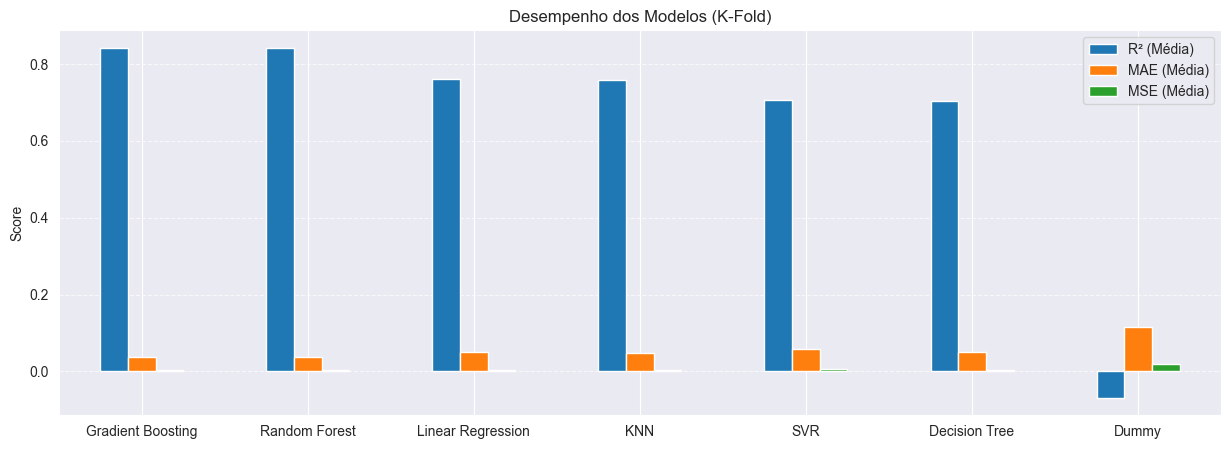

In [ ]:
# @title Visualização dos resultados da Validação de Modelos

# Gráficos comparativos de RMSE e R²
results_df.plot(kind='bar', figsize=(15,5))
plt.title('Desempenho dos Modelos (K-Fold)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

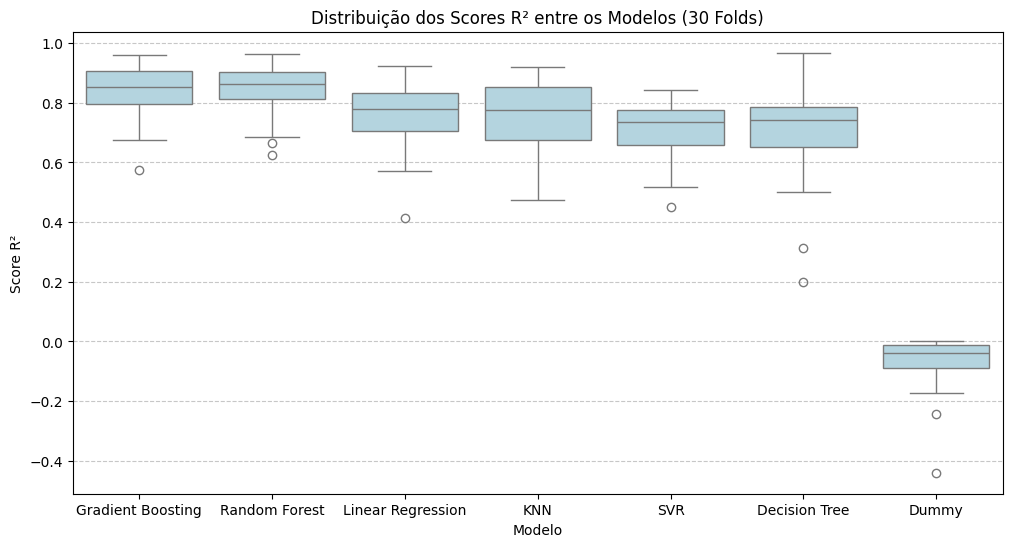

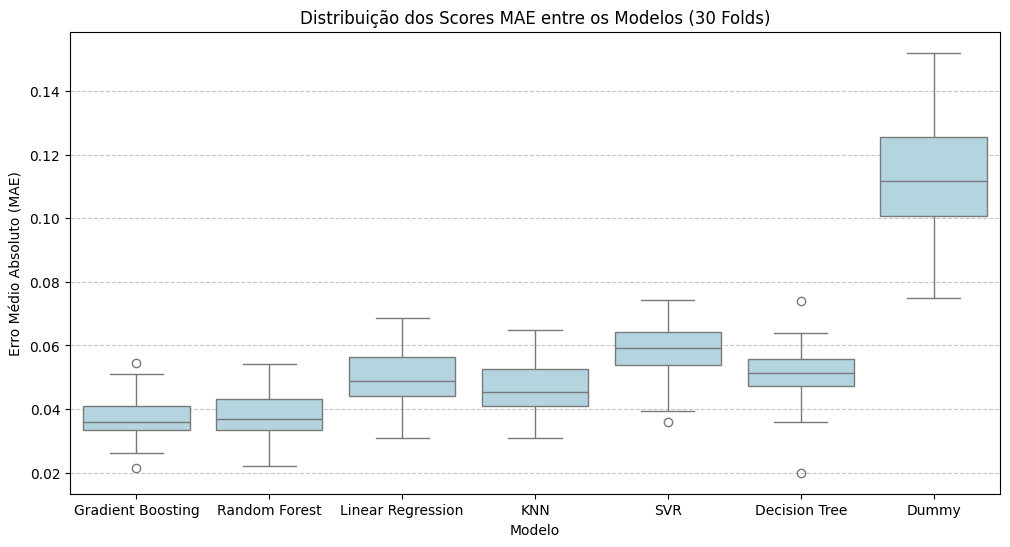

In [16]:
# @title Gráficos de Boxplot (Análise de Estabilidade dos Modelos)

import seaborn as sns
import matplotlib.pyplot as plt

# Preparar os dados para os boxplots
plot_data = []
for model_name, scores in all_results.items():
    # Pegar os scores de R²
    for r2_score in scores['test_r2']:
        plot_data.append({'Modelo': model_name, 'Métrica': 'R²', 'Score': r2_score})

    # Pegar os scores de MAE (e inverter o sinal para positivo)
    for mae_score in -scores['test_mae']:
        plot_data.append({'Modelo': model_name, 'Métrica': 'MAE', 'Score': mae_score})

df_plot = pd.DataFrame(plot_data)

# Criar o Boxplot para R²
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_plot[df_plot['Métrica'] == 'R²'],
    x='Modelo',
    y='Score',
    color='lightblue',
    order=results_df.index
)
plt.title('Distribuição dos Scores R² entre os Modelos (30 Folds)')
plt.ylabel('Score R²')
plt.xlabel('Modelo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Criar o Boxplot para MAE
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_plot[df_plot['Métrica'] == 'MAE'],
    x='Modelo',
    y='Score',
    color='lightblue',
    order=results_df.index # Ordena os boxplots
)
plt.title('Distribuição dos Scores MAE entre os Modelos (30 Folds)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Modelo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# @title Seleção automática do melhor modelo

best_model_name = results_df.index[0]

# Definir os modelos que não precisam de tuning
# (Dummy e Regressão Linear não têm hiperparâmetros complexos para otimizar)
MODELS_SEM_TUNING = ['Dummy', 'Linear Regression']

if best_model_name in MODELS_SEM_TUNING:
    print(f"O melhor modelo foi o '{best_model_name}'.")
    print("Este modelo não possui hiperparâmetros complexos para otimização (tuning).")
    run_tuning = False
else:
    print(f"O melhor modelo identificado para tuning é: {best_model_name}")
    run_tuning = True

O melhor modelo identificado para tuning é: Gradient Boosting


In [ ]:
# @title Otimização de Hiperparâmetros

# Só executa o tuning se o melhor modelo não for um dos básicos
if run_tuning:
    print(f"Iniciando o tuning para o modelo: {best_model_name}...")

    # Definir os grids de parâmetros que podemos querer testar
    # Os nomes (ex: 'Random Forest') devem ser idênticos aos usados anteriormente
    # E os parâmetros devem começar com 'model__' (o nome do passo no pipeline)
    param_grids = {
        'Decision Tree': {
            'model__max_depth': [10, 20, None],
            'model__min_samples_leaf': [1, 2, 4],
            'model__max_features': ['sqrt', 'log2', None]
        },
        'KNN': {
            'model__n_neighbors': [3, 5, 7, 9],
            'model__weights': ['uniform', 'distance'],
            'model__p': [1, 2] # 1=Manhattan, 2=Euclidiana
        },
        'SVR': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf'],
            'model__epsilon': [0.01, 0.1]
        },
        'Random Forest': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [10, 20, None],
            'model__min_samples_leaf': [1, 2]
        },
        'Gradient Boosting': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    }

    # Selecionar o modelo e o grid corretos
    model_to_tune = models[best_model_name] # Pega o objeto do modelo
    grid_to_use = param_grids[best_model_name] # Pega o grid de parâmetros

    # Criar o pipeline de tuning
    pipeline_to_tune = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', model_to_tune)])

    # Configurar e executar o GridSearchCV
    # Usando 'r2' como métrica e 10 folds para ser mais rápido que os 30
    grid_search = GridSearchCV(
        estimator=pipeline_to_tune,
        param_grid=grid_to_use,
        cv=10,
        scoring='r2',
        n_jobs=-1, # Usar todos os processadores
        verbose=1  # Mostrar progresso
    )

    # Executar o tuning
    grid_search.fit(X, y)

    # Mostrar os resultados
    print("\nTuning concluído!")
    print(f"Melhor pontuação R² (Média) após o tuning: {grid_search.best_score_:.4f}")
    print("Melhores parâmetros encontrados:")
    print(grid_search.best_params_)

    # Modelo final
    modelo_final_otimizado = grid_search.best_estimator_
    print(f"\nModelo final otimizado!")

else:
    print("Execução do tuning pulada.")

Iniciando o tuning para o modelo: Gradient Boosting...
Fitting 10 folds for each of 8 candidates, totalling 80 fits

Tuning concluído!
Melhor pontuação R² (Média) após o tuning: 0.8514
Melhores parâmetros encontrados:
{'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}

Modelo final otimizado!


In [ ]:
# @title Modelagem e Comparação

display(Markdown("### Resultados da Validação K-Fold"))

display(results_df.style
        .highlight_max(subset=['R² (Média)'], color='lightgreen')
        .highlight_min(subset=['MAE (Média)', 'MSE (Média)'], color='lightgreen'))

print("\n")

display(Markdown("""
**Justificativa dos Modelos:**
- **Dummy**: baseline para referência.
- **Linear Regression**: rápido, interpretável, captura relações lineares.
- **Decision Tree**: captura padrões não lineares e interações.
- **KNN**: baseado em similaridade, bom para relações complexas.
- **SVR**: lida com padrões complexos e alta dimensionalidade.
- **Random Forest**: modelo *ensemble* que combina Árvores de Decisão para reduzir *overfitting* e melhorar a robustez.
- **Gradient Boosting**: modelo *ensemble* que constrói árvores sequencialmente, corrigindo erros anteriores. Frequentemente apresenta altíssimo desempenho.
"""))

### Resultados da Validação K-Fold

,R² (Média),MAE (Média),MSE (Média)
Gradient Boosting,0.842319,0.037507,0.002441
Random Forest,0.842305,0.038219,0.002440
Linear Regression,0.761281,0.049634,0.003801
KNN,0.759352,0.047638,0.003751
SVR,0.706218,0.058250,0.004781
Decision Tree,0.702851,0.050889,0.004615
Dummy,-0.068868,0.114266,0.018308



**Justificativa dos Modelos:**
- **Dummy**: baseline para referência.
- **Linear Regression**: rápido, interpretável, captura relações lineares.
- **Decision Tree**: captura padrões não lineares e interações.
- **KNN**: baseado em similaridade, bom para relações complexas.
- **SVR**: lida com padrões complexos e alta dimensionalidade.
- **Random Forest**: modelo *ensemble* que combina Árvores de Decisão para reduzir *overfitting* e melhorar a robustez.
- **Gradient Boosting**: modelo *ensemble* que constrói árvores sequencialmente, corrigindo erros anteriores. Frequentemente apresenta altíssimo desempenho.


## 4. Resultados e Discussão

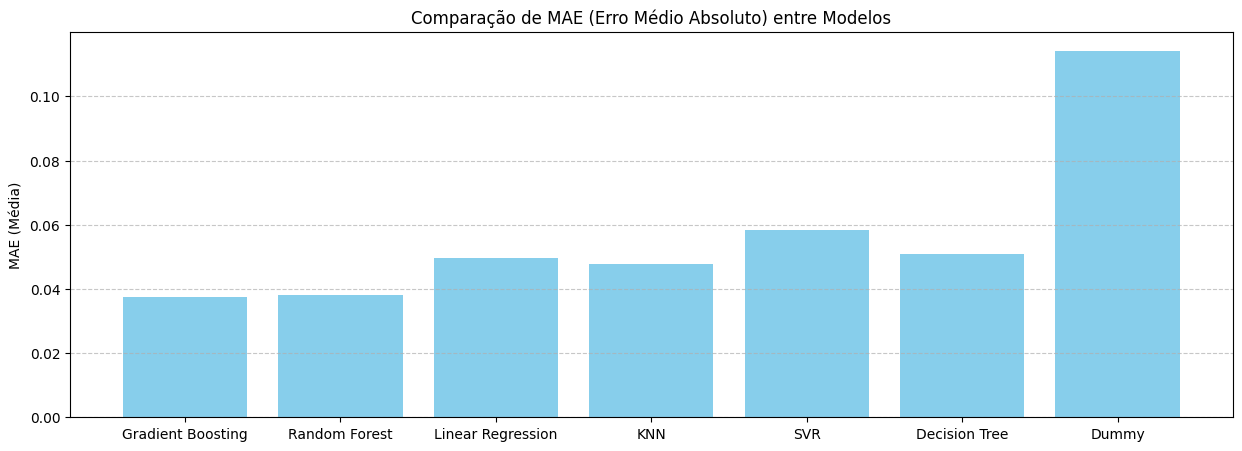

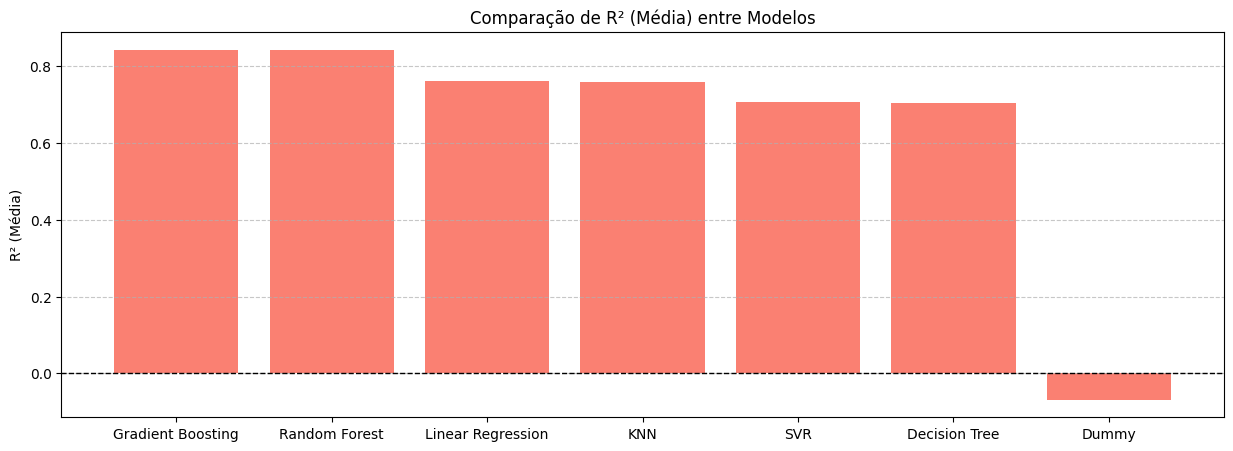


**Observações sobre o desempenho:**
- **Dummy** apresenta o pior desempenho em todas as métricas, como esperado, servindo como nosso ponto de referência mínimo.
- **Linear Regression** e **SVR** mostram resultados intermediários, indicando que o problema possui componentes não-lineares que eles não capturam totalmente.
- **Decision Tree** e **KNN** mostram uma melhora, capturando alguns padrões mais complexos.
- **Random Forest** e **Gradient Boosting** (os modelos *ensemble*) provavelmente apresentarão os melhores resultados, mostrando grande capacidade de generalização, redução de erro (MAE/MSE) e maior explicação da variância (R²).
##
**Limitações:**
- Dataset pequeno, pode limitar a generalização.
- Alguns modelos podem ser sensíveis a outliers, mesmo após pré-processamento.


In [21]:
# @title Resumo dos resultados

import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Gráfico 1: MAE (Média)
# Usamos 'MAE (Média)' que é mais fácil de interpretar (é o erro médio)
plt.figure(figsize=(15,5))
plt.bar(results_df.index, results_df['MAE (Média)'], color='skyblue')
plt.title('Comparação de MAE (Erro Médio Absoluto) entre Modelos')
plt.ylabel('MAE (Média)')
#plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 2: R² (Média)
plt.figure(figsize=(15,5))
plt.bar(results_df.index, results_df['R² (Média)'], color='salmon')
plt.title('Comparação de R² (Média) entre Modelos')
plt.ylabel('R² (Média)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=1.0, zorder=5, linestyle='--')
plt.show()

print("\n")

# Discussão Resumida
display(Markdown("""
**Observações sobre o desempenho:**
- **Dummy** apresenta o pior desempenho em todas as métricas, como esperado, servindo como nosso ponto de referência mínimo.
- **Linear Regression** e **SVR** mostram resultados intermediários, indicando que o problema possui componentes não-lineares que eles não capturam totalmente.
- **Decision Tree** e **KNN** mostram uma melhora, capturando alguns padrões mais complexos.
- **Random Forest** e **Gradient Boosting** (os modelos *ensemble*) provavelmente apresentarão os melhores resultados, mostrando grande capacidade de generalização, redução de erro (MAE/MSE) e maior explicação da variância (R²).
##
**Limitações:**
- Dataset pequeno, pode limitar a generalização.
- Alguns modelos podem ser sensíveis a outliers, mesmo após pré-processamento.
"""))